In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("train.csv")

# First 10 rows
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [3]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
# Rename columns for clarity
df.rename(columns={
    "ApplicantIncome": "Income",
    "LoanAmount": "Loan_Amount",
    "Loan_Amount_Term": "Loan_Term",
    "Credit_History": "Credit_Score",
    "Self_Employed": "Employment_Status"
}, inplace=True)

# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna("Unknown", inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Create Default_Status (Rejected = 1)
df["Default_Status"] = np.where(df["Loan_Status"] == "N", 1, 0)

# Create Debt Ratio
df["Debt_Ratio"] = df["Loan_Amount"] / df["Income"]

In [5]:
for col in ["Income","Loan_Amount","Credit_Score"]:
    print("\n", col)
    print("Mean:", df[col].mean())
    print("Median:", df[col].median())
    print("Mode:", df[col].mode()[0])


 Income
Mean: 5403.459283387622
Median: 3812.5
Mode: 2500

 Loan_Amount
Mean: 145.75244299674267
Median: 128.0
Mode: 128.0

 Credit_Score
Mean: 0.8550488599348535
Median: 1.0
Mode: 1.0


In [6]:
for col in ["Income","Loan_Amount","Credit_Score"]:
    print("\n", col)
    print("Range:", df[col].max() - df[col].min())
    print("Variance:", df[col].var())
    print("Std Dev:", df[col].std())
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    print("IQR:", Q3 - Q1)


 Income
Range: 80850
Variance: 37320390.167181164
Std Dev: 6109.041673387174
IQR: 2917.5

 Loan_Amount
Range: 691.0
Variance: 7074.026706909471
Std Dev: 84.10723338042615
IQR: 64.5

 Credit_Score
Range: 1.0
Variance: 0.12414249353050996
Std Dev: 0.3523386063583013
IQR: 0.0


In [7]:
for col in ["Income","Loan_Amount"]:
    print("\n", col)
    print("Skewness:", df[col].skew())
    print("Kurtosis:", df[col].kurt())


 Income
Skewness: 6.539513113994625
Kurtosis: 60.54067593369113

 Loan_Amount
Skewness: 2.743052748820892
Kurtosis: 10.936694906900337


In [8]:
# Avg loan by Employment Status
df.groupby("Employment_Status")["Loan_Amount"].mean()

# Default rate by Property Area
df.groupby("Property_Area")["Default_Status"].mean()

# Approval rate by Credit Score
df.groupby("Credit_Score")["Loan_Status"].value_counts(normalize=True)

Credit_Score  Loan_Status
0.0           N              0.921348
              Y              0.078652
1.0           Y              0.790476
              N              0.209524
Name: proportion, dtype: float64

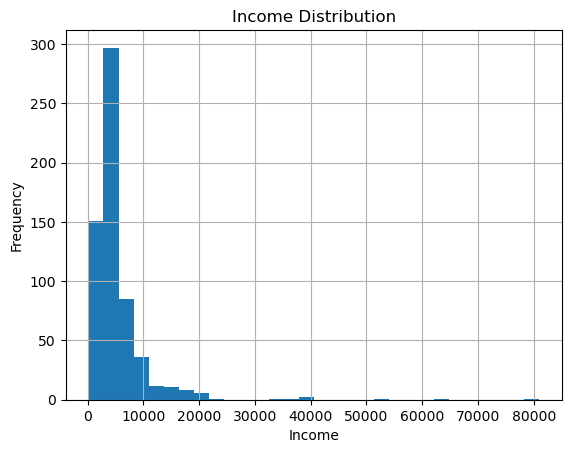

In [9]:
plt.hist(df["Income"], bins=30)
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.grid()
plt.show()


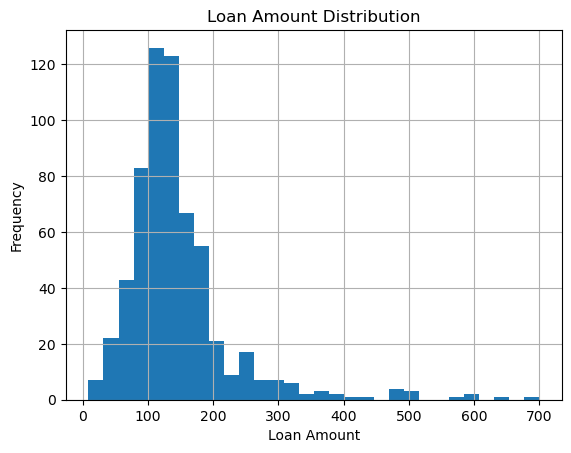

In [10]:
plt.hist(df["Loan_Amount"], bins=30)
plt.title("Loan Amount Distribution")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.grid()
plt.show()

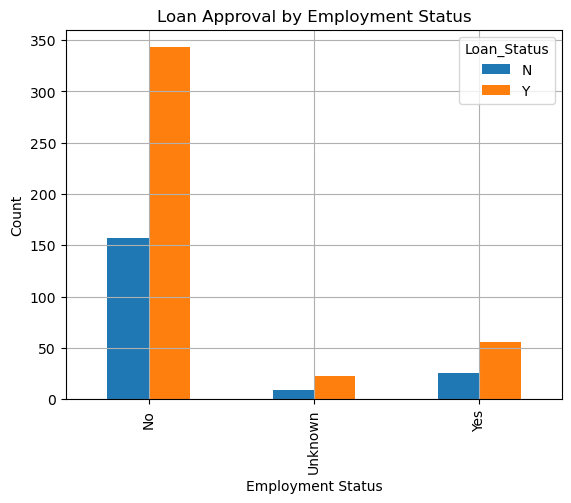

In [11]:
df.groupby("Employment_Status")["Loan_Status"].value_counts().unstack().plot(kind="bar")
plt.title("Loan Approval by Employment Status")
plt.xlabel("Employment Status")
plt.ylabel("Count")
plt.grid()
plt.show()

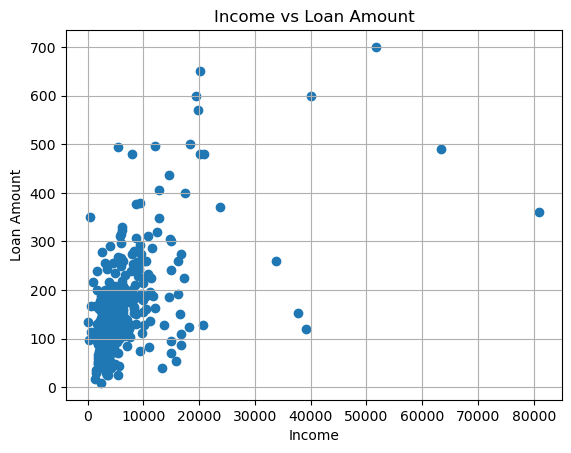

In [12]:
plt.scatter(df["Income"], df["Loan_Amount"])
plt.title("Income vs Loan Amount")
plt.xlabel("Income")
plt.ylabel("Loan Amount")
plt.grid()
plt.show()

In [13]:
cols = ["Income","Loan_Amount","Credit_Score","Debt_Ratio"]

print("Covariance Matrix")
print(df[cols].cov())

print("\nCorrelation Matrix")
print(df[cols].corr())

Covariance Matrix
                    Income    Loan_Amount  Credit_Score  Debt_Ratio
Income        3.732039e+07  290397.998060    -40.068717  -60.772940
Loan_Amount   2.903980e+05    7074.026707     -0.017998    0.454140
Credit_Score -4.006872e+01      -0.017998      0.124142    0.000298
Debt_Ratio   -6.077294e+01       0.454140      0.000298    0.003017

Correlation Matrix
                Income  Loan_Amount  Credit_Score  Debt_Ratio
Income        1.000000     0.565181     -0.018615   -0.181112
Loan_Amount   0.565181     1.000000     -0.000607    0.098303
Credit_Score -0.018615    -0.000607      1.000000    0.015373
Debt_Ratio   -0.181112     0.098303      0.015373    1.000000


In [14]:
print("P(Default):", df["Default_Status"].mean())
print("P(Income > Avg):", (df["Income"] > df["Income"].mean()).mean())
print("P(Credit Score < 1):", (df["Credit_Score"] == 0).mean())
print("P(Approved):", (df["Loan_Status"] == "Y").mean())

P(Default): 0.3127035830618892
P(Income > Avg): 0.28664495114006516
P(Credit Score < 1): 0.1449511400651466
P(Approved): 0.6872964169381107


In [15]:
print("P(Default | Low Credit):",
      df[df["Credit_Score"] == 0]["Default_Status"].mean())

print("P(Approved | Income > Median):",
      df[df["Income"] > df["Income"].median()]["Loan_Status"].eq("Y").mean())

print("P(Default | High Debt Ratio):",
      df[df["Debt_Ratio"] > 0.5]["Default_Status"].mean())

P(Default | Low Credit): 0.9213483146067416
P(Approved | Income > Median): 0.6872964169381107
P(Default | High Debt Ratio): 1.0


In [16]:
p = df["Default_Status"].mean()

simulated = np.random.binomial(n=1, p=p, size=1000)

print("Actual Default Rate:", p)
print("Simulated Default Rate:", simulated.mean())

Actual Default Rate: 0.3127035830618892
Simulated Default Rate: 0.3


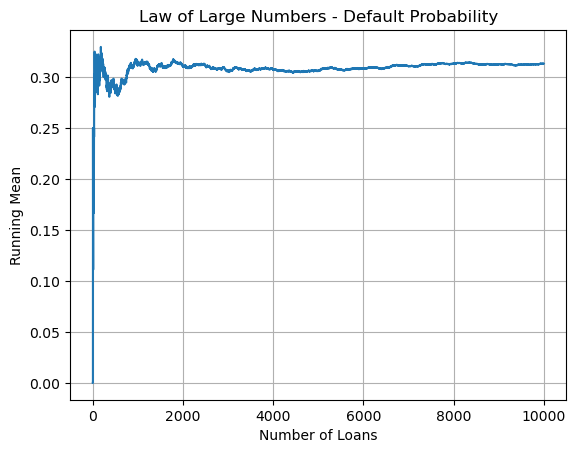

In [17]:
sim = np.random.binomial(1, p, 10000)
running_mean = np.cumsum(sim) / np.arange(1,10001)

plt.plot(running_mean)
plt.title("Law of Large Numbers - Default Probability")
plt.xlabel("Number of Loans")
plt.ylabel("Running Mean")
plt.grid()
plt.show()

In [18]:
expected_loss = df["Loan_Amount"].mean() * df["Default_Status"].mean()
variance_loan = df["Loan_Amount"].var()

print("Expected Loan Loss:", expected_loss)
print("Variance of Loan Amount:", variance_loan)

Expected Loan Loss: 45.57731116510519
Variance of Loan Amount: 7074.026706909471


In [19]:
df[df["Default_Status"]==1].groupby("Property_Area")["Income"].mean()

Property_Area
Rural        6497.521739
Semiurban    5296.851852
Urban        4511.420290
Name: Income, dtype: float64

In [20]:
df.to_csv("Cleaned_Loan_Data.csv", index=False)